**Susie Mueller**

Spring 2024

CS 251: Data Analysis and Visualization

# Lab 4b | Principal Component Analysis

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [6,6]})

np.set_printoptions(suppress=True, precision=5)

## Task 1: Load and preprocess data

We are using the [Wisconsin Breast Cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)) this week. We will use principal component analysis (PCA) to gain insight about the structure of the dataset.

1. Import dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe from the url:  https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv
2. Create a `cancer_x` DataFrame which includes all of the columns that have the word "mean" in the title (*there should be 10 in total*).
3. Print out a summary of the `cancer_x` DataFrame.
4. Update `cancer_x` so that each variable is min-max normalized. Print out a summary of the updated DataFrame.
5. `diagnosis` is a categorical variable (`M` stands for "malignant" and `B` stands for "benign"). Create a `cancer_y` Series with from the column `diagnosis` and convert the data type to [categorical](https://pandas.pydata.org/docs/user_guide/categorical.html).
    1. In Task 2 of this lab you will use `diagnosis` to color-code a scatter plot of the cancer data. Use [pd.replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to replace the categorical levels with color string names. To do this, pass in a dictionary as the `replace` method parameter that maps the strings `'M'` and `'B'` to [colors](https://matplotlib.org/stable/gallery/color/named_colors.html) of your choice (e.g. `'red'`, `'blue'`). By default, the `replace` method doesn't update the DataFrame when you call it, so don't forget to update the value of `cancer_y` by assigning it to the output of your `replace` method call.
    2. Print out `cancer_y`. You should see the `dtype` as `category` and the values should be one of two named color strings (e.g. `'red'`, `'blue'`).

In [113]:
url = "https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"
df = pd.read_csv(url) # import Wisconsin Breast Cancer dataset

# create and normalize cancer_x
cancer_x = df.filter(like = 'mean') # create df with only columns containing 'mean'
cancer_x.describe() # print a summary of dataframe
normal_cancer_x = (cancer_x - cancer_x.min()) / (cancer_x.max() - cancer_x.min()) # normalize data
print(normal_cancer_x.describe())

# create cancer_y
cancer_y = df['diagnosis'].astype('category') # get column and convert datatype to categorical
cancer_y = cancer_y.replace(to_replace = {'M': 'red', 'B': 'blue'})
print(cancer_y)

       radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
count   569.000000    569.000000      569.000000  569.000000       569.000000   
mean      0.338222      0.323965        0.332935    0.216920         0.394785   
std       0.166787      0.145453        0.167915    0.149274         0.126967   
min       0.000000      0.000000        0.000000    0.000000         0.000000   
25%       0.223342      0.218465        0.216847    0.117413         0.304595   
50%       0.302381      0.308759        0.293345    0.172895         0.390358   
75%       0.416442      0.408860        0.416765    0.271135         0.475490   
max       1.000000      1.000000        1.000000    1.000000         1.000000   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count        569.000000      569.000000           569.000000     569.000000   
mean           0.260601        0.208058             0.243137       0.379605   
std            0.161992        0.

/var/folders/y1/6frwydl9009f0pss13f2wqwh0000gn/T/ipykernel_6365/978219122.py:12: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cancer_y = cancer_y.replace(to_replace = {'M': 'red', 'B': 'blue'})


## Task 2: PCA

### 2a. Create and visualize a covariance matrix

1. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation to find out how to compute the covariance matrix of the `cancer_x` columns, store it, and print its shape.
2. Use the [matplotlib](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) and [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) documentation to visualize the covariance matrix with a heatmap.
    1. Include a title
    2. Include labels for each row and column 
        1. Set the `xticks`, `yticks`, `xticklabels` and `ytickslabels`
        2. If necessary, rotating the text for the x-axis using `setp`
    3. Use an perceptually uniform sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). 
        1. Set it using the `cmap` parameter for `imshow`
    4. Include a `colorbar`. This can be achieved by assigning a variable to your `imshow` call and then passing in that variable as a parameter to `plt.colorbar`. If that does not work, the [this example code](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#using-the-helper-function-code-style) may be helpful.

*Your heatmap should show a 10x10 grid of colored squares.*

(10, 10)


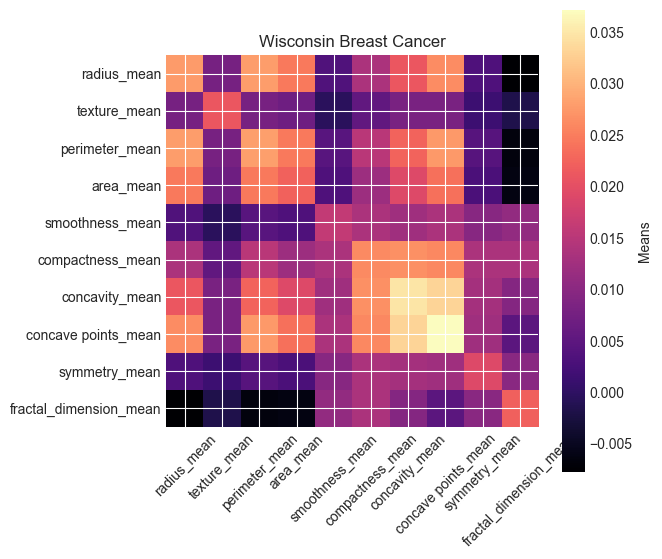

In [114]:
# create covariance matrix of cancer_x
cov_cancer_x = normal_cancer_x.cov()
print(cov_cancer_x.shape)

# visualize covariance matrix with a heatmap
fig, ax = plt.subplots()
heatmap = ax.imshow(cov_cancer_x, cmap = "magma")
ax.set_title("Wisconsin Breast Cancer")
ax.set_xticks(range(len(cov_cancer_x.columns)))
ax.set_yticks(range(len(cov_cancer_x.columns)))
ax.set_xticklabels(cov_cancer_x.columns, rotation = 45)
ax.set_yticklabels(cov_cancer_x.columns)
cbar = plt.colorbar(heatmap)
cbar.set_label("Means")
plt.show()

### 2b. Questions

**Question 1:** What interpretations can you draw from this covariance matrix?

**Answer 1:** The interpretations I can draw are that the lighter the color in the heatmap, the larger the mean for its corresponding variable. Conversely, the darker the color of the heatmap, the smaller the mean for its corresponding variable. This heatmap is helpful in learning the typical measurements regarding breast cancer. 

### 2c. Performing PCA

Use Sci-kit Learn's [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to apply PCA to the cancer dataset.
1. Create an instance of the PCA class with 2 components. *This means that we will reduce the dimensionality of the cancer dataset from 10-D to 2-D*.
2. Call the method `fit_transform` with `cancer_x` as the X parameter and saving the results into a new variable representing the transformed values.
3. Print the shape of the transformed values. The transformed values should have the shape `(569, 2)`.
4. Print the first 5 rows of the transformed data.

In [115]:
from sklearn.decomposition import PCA

In [116]:
# reduce dimensionality of cancer dataset from 10-D to 2-D
pca = PCA(n_components = 2) # create instance of PCA class with 2 components

cancer_x_transform = pca.fit_transform(normal_cancer_x)

print("PCA-transformed data shape: ", cancer_x_transform.shape)

print("Transformed data: \n", cancer_x_transform[:5])

print('''
-------------------------------------
Your results should look like this:
-------------------------------------
PCA-transformed data shape: (569, 2)
Transformed data:
[[ 0.89009  0.51092]
 [ 0.30381 -0.39424]
 [ 0.67735 -0.07657]
 [ 0.53311  1.05071]
 [ 0.56301 -0.19896]]
-------------------------------------
''')

PCA-transformed data shape:  (569, 2)
Transformed data: 
 [[ 0.89009  0.51092]
 [ 0.30381 -0.39424]
 [ 0.67735 -0.07657]
 [ 0.53311  1.05071]
 [ 0.56301 -0.19896]]

-------------------------------------
Your results should look like this:
-------------------------------------
PCA-transformed data shape: (569, 2)
Transformed data:
[[ 0.89009  0.51092]
 [ 0.30381 -0.39424]
 [ 0.67735 -0.07657]
 [ 0.53311  1.05071]
 [ 0.56301 -0.19896]]
-------------------------------------



### 2d. Graph a scatter plot of the transformed data

Graph a scatter plot of the transformed data using [plt.scatter](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.scatter.html)
1. Scatter Parameters
    1. Graph the first principle component on the x axis (first column of the tranformed data)
    2. Graph the second principle component on the y axis (second column of the tranformed data)
    3. Use the `cancer_y` series for the color with a black edgecolor
3. Include a title, and axis labels.
4. Add a custom [legend](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists) using mpatches.
    1. Create 1 patch with the `color` keyword argument set to whatever named color string you set for malignant
    1. Create 1 patch with the `color` keyword argument set to whatever named color string you set for benign

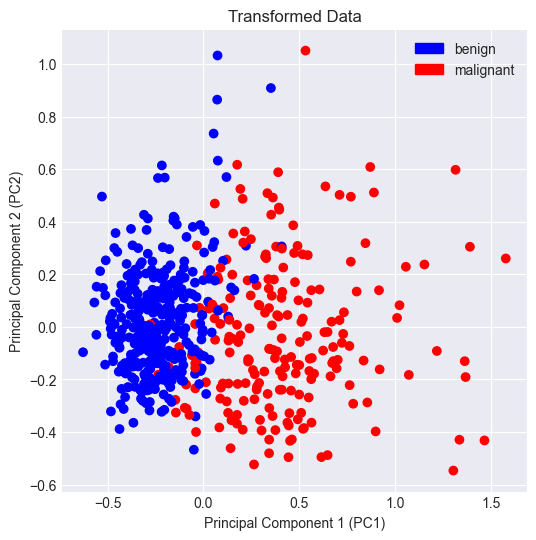

In [117]:
import matplotlib.patches as mpatches

pc1 = cancer_x_transform[:, 0]
pc2 = cancer_x_transform[:, 1]

# plot
plt.scatter(pc1, pc2, c = cancer_y)
plt.title("Transformed Data")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")

# legend
b_patch = mpatches.Patch(color='blue', label='benign')
m_patch = mpatches.Patch(color='red', label='malignant')
plt.legend(handles=[b_patch, m_patch])
plt.show()

### 2d. Visualize the PCA loadings

In PCA, the **loadings** refer to the numbers that make up the principal component vectors (i.e. the eigenvectors). The shape of the loadings (eigenvectors) are `(k, M)` where `k` is the number of PCs and `M` is the number of original variables in the dataset. This task focuses on visualizing and interpreting what the loadings mean.

1. Print out the shape of the loadings. The [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) of Scikit-learn stores these as a field called `components_`.
2. Use [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to make a heatmap of the loadings. You should plot the **transposed** loadings, which will make your plot more readable â€” i.e. your heatmap should be taller than it is wide.
   1. Include a title.
   2. Set the `xticks`, `yticks`, `xticklabels` and `ytickslabels`. The y tick labels (rows) should show the original 10 variable names. The 2 x tick labels should be labeled with `'PC1'` and `'PC2'`.
   3. Use an perceptually uniform **diverging** [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). Set it using the `cmap` parameter for `imshow`.
   4. Include a `colorbar`. This can be achieved by assigning a variable to your `imshow` call and then passing in that variable as a parameter to `plt.colorbar`. If that does not work, the [this example code](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#using-the-helper-function-code-style) may be helpful.

(2, 10)


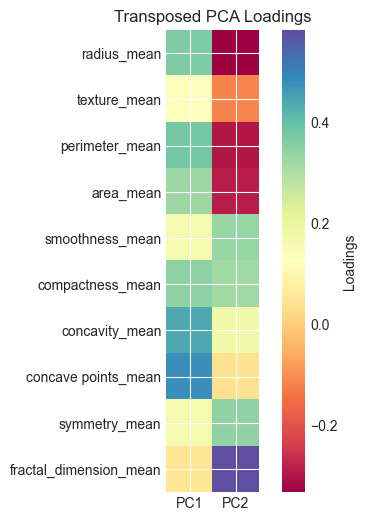

In [119]:
# print shape of loadings
print(pca.components_.shape)

loadings = pca.components_.T

# make heatmap of loadings 
fig, ax = plt.subplots()
heatmap = ax.imshow(loadings, cmap = 'Spectral')
ax.set_title("Transposed PCA Loadings")
ax.set_xticks([0, 1])
ax.set_xticklabels(['PC1', 'PC2'])
ax.set_yticks(range(len(normal_cancer_x.columns)))
ax.set_yticklabels(normal_cancer_x.columns)
cbar = plt.colorbar(heatmap)
cbar.set_label("Loadings")
plt.show()

### 2e. Questions

**Question 2:** Interpret the loadings of PC1 and PC2. Which variables in the cancer dataset are most positively and negatively correlated with each PC?

**Answer 2:** The heatmap shows the PC1 and PC2 loadings from Wisconsin breast cancer dataset. PC1 shows the higher PCA loadings, reflected by colors such as blue, green, and yellow. On the other hand, the PC2 loadings are represented with red, orange, yellow, green, and purple, reflecting lower loadings in comparison to PC1. The variable most positively correlated with PC1 is "concave points_mean", while the variable most negatively correlated with PC1 is "fractal_dimension_mean". The variable most positively correlated with PC2 is "fractal_dimension_mean", while the variable most negatively correlated with PC2 is "radius_mean". 

## Turn in your lab

Follow the usual submission format and submit your lab on Google Classroom.